# Install rdkit

using pypi or whatever install rdkit


In [ ]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 27.9 MB/s eta 0:00:00


## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



Num Atoms: 11

Atoms: 
C
C
O
N
C
C
C
C
O
C
C

Num Bonds: 11


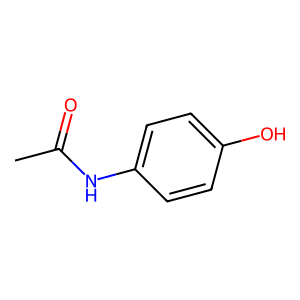

In [ ]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Draw import MolToImage

smile_para = "CC(=O)NC1=CC=C(O)C=C1"
paracetamol = MolFromSmiles(smile_para)

print(f"Num Atoms: {paracetamol.GetNumAtoms()}")
# The Hydrogen atoms are inducted.

print("\nAtoms: ")
for atom in paracetamol.GetAtoms():
    print(atom.GetSymbol())

print(f"\nNum Bonds: {paracetamol.GetNumBonds()}")

MolToImage(paracetamol)

## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
the following url: https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf


1. Download this file and save it in a folder.


2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"


3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

In [ ]:
from rdkit.Chem import SDMolSupplier

supplier = SDMolSupplier("/content/DB00295.sdf")
morphine = next(supplier)

## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".



3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [ ]:
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import numpy as np

def smiles_to_np_morganfingerprinting(smile):
  mol = MolFromSmiles(smile)
  fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)

  np_array = np.zeros((1,), dtype=np.int8)
  DataStructs.ConvertToNumpyArray(fingerprint, np_array)

  return np_array

arr_aspirin = smiles_to_np_morganfingerprinting('CC(=O)OC1=CC=CC=C1C(O)=O')
arr_paracetamol = smiles_to_np_morganfingerprinting('CC(=O)NC1=CC=C(O)C=C1')

print(arr_aspirin)
print(arr_paracetamol)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


[14:42:59] DEPRECATION WARNING: please use MorganGenerator
[14:42:59] DEPRECATION WARNING: please use MorganGenerator


In [ ]:
def smiles_to_np_morganfingerprinting(smile):
  mol = MolFromSmiles(smile)
  fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)

  return fingerprint

arr_aspirin = smiles_to_np_morganfingerprinting('CC(=O)OC1=CC=CC=C1C(O)=O')
arr_paracetamol = smiles_to_np_morganfingerprinting('CC(=O)NC1=CC=C(O)C=C1')

similarity = DataStructs.DiceSimilarity(arr_aspirin, arr_paracetamol)

print(f"DiceSimilarity between paracetamol and aspirin: {similarity}")

DiceSimilarity between paracetamol and aspirin: 0.37209302325581395


[14:42:59] DEPRECATION WARNING: please use MorganGenerator
[14:42:59] DEPRECATION WARNING: please use MorganGenerator


## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [ ]:
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

calculator = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
descriptors = calculator.CalcDescriptors(paracetamol)
print(descriptors)


(10.524468537414966, 10.524468537414966, 0.11510204081632636, -0.11510204081632636, 0.5950261967780849, 9.181818181818182, 151.165, 142.093, 151.063328528, 58, 0, 0.22074743631242583, -0.5079643157925783, 0.5079643157925783, 0.22074743631242583, 1.3636363636363635, 1.9090909090909092, 2.3636363636363638, 16.25468871437965, 10.280190859964755, 1.9280360590359866, -1.9945540738765895, 2.12524757916018, -2.04401131261029, 5.88095478459792, -0.11373578338266109, 1.9291266251851134, 2.7362980721056545, 253.29949758389105, 8.267584713501616, 6.164862962722325, 6.164862962722325, 5.1815405503520555, 3.2490981480278296, 3.2490981480278296, 2.228060242189872, 2.228060242189872, 1.1876733148984595, 1.1876733148984595, 0.7480265991539318, 0.7480265991539318, -1.5099999999999998, 285.51074052739676, 7.595374077976819, 3.0531381005525, 2.292303972882069, 64.66690538413799, 10.423315998847038, 5.749511833283905, 0.0, 5.907179729351506, 0.0, 0.0, 4.794537184071822, 0.0, 0.0, 0.0, 0.0, 24.265468273846

[14:44:03] DEPRECATION WARNING: please use MorganGenerator
[14:44:03] DEPRECATION WARNING: please use MorganGenerator
[14:44:03] DEPRECATION WARNING: please use MorganGenerator


## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


2. Highlight the pattern "CCC" in these molecules.


3. Do the same thing ex 1 but for the pattern "C(=O)N".

## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


1. Download file from the following link: https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf.


2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.


4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



In [ ]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf

--2024-10-02 14:44:45--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1376487 (1.3M) [text/plain]
Saving to: ‘solubility.train.sdf’

solubility.train.sd 100%[===================>]   1.31M  --.-KB/s    in 0.02s   

2024-10-02 14:44:46 (52.6 MB/s) - ‘solubility.train.sdf’ saved [1376487/1376487]



In [ ]:
supplier = SDMolSupplier('/content/solubility.train.sdf', removeHs=False)
molecule_list = [mol for mol in supplier if mol is not None]

In [ ]:
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd


def calculate_descriptors(mol):
    calculator = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    descriptors = calculator.CalcDescriptors(mol)
    return np.array(descriptors)


df = pd.DataFrame([calculate_descriptors(mol) for mol in molecule_list])

[14:59:37] DEPRECATION WARNING: please use MorganGenerator
[14:59:37] DEPRECATION WARNING: please use MorganGenerator
[14:59:37] DEPRECATION WARNING: please use MorganGenerator
[14:59:38] DEPRECATION WARNING: please use MorganGenerator
[14:59:38] DEPRECATION WARNING: please use MorganGenerator
[14:59:38] DEPRECATION WARNING: please use MorganGenerator
[14:59:38] DEPRECATION WARNING: please use MorganGenerator
[14:59:38] DEPRECATION WARNING: please use MorganGenerator
[14:59:38] DEPRECATION WARNING: please use MorganGenerator
[14:59:38] DEPRECATION WARNING: please use MorganGenerator
[14:59:38] DEPRECATION WARNING: please use MorganGenerator
[14:59:38] DEPRECATION WARNING: please use MorganGenerator
[14:59:38] DEPRECATION WARNING: please use MorganGenerator
[14:59:38] DEPRECATION WARNING: please use MorganGenerator
[14:59:38] DEPRECATION WARNING: please use MorganGenerator
[14:59:38] DEPRECATION WARNING: please use MorganGenerator
[14:59:38] DEPRECATION WARNING: please use MorganGenerat

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,2.211806,2.211806,1.343750,1.343750,0.468786,8.4,72.151,60.055,72.09390,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,1.500000,1.500000,1.500000,1.500000,0.408362,24.0,70.135,60.055,70.07825,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.231806,2.231806,1.355000,1.355000,0.462954,9.0,86.178,72.066,86.10955,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,2.253472,2.253472,0.898148,0.898148,0.483890,10.0,86.178,72.066,86.10955,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.243056,2.243056,0.541667,0.541667,0.424482,12.0,86.178,72.066,86.10955,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
labels = [float(mol.GetProp('SOL')) for mol in molecule_list]
labels

[-3.18,
 -2.64,
 -3.84,
 -3.74,
 -3.55,
 -3.1,
 -3.3,
 -4.53,
 -3.85,
 -5.24,
 -3.52,
 -4.15,
 -2.54,
 -2.1,
 -3.23,
 -3.24,
 -3.82,
 -3.27,
 -4.44,
 -5.05,
 -2.68,
 -2.03,
 -1.87,
 -1.97,
 -4.0,
 -1.64,
 -2.36,
 -3.01,
 -4.24,
 -1.64,
 -2.21,
 -2.8,
 -2.77,
 -2.82,
 -3.37,
 -3.31,
 -3.2,
 -3.21,
 -3.11,
 -3.27,
 -4.06,
 -3.75,
 -3.77,
 -3.66,
 -3.89,
 -4.0,
 -4.64,
 -4.15,
 -2.82,
 -4.31,
 -4.17,
 -4.91,
 -5.22,
 -3.6,
 -3.77,
 -3.7,
 -4.29,
 -4.74,
 -4.72,
 -3.96,
 -4.14,
 -4.89,
 -4.63,
 -4.92,
 -5.26,
 -5.89,
 -6.96,
 -6.19,
 -6.0,
 -5.96,
 -6.68,
 -8.04,
 -6.74,
 -8.19,
 -7.02,
 -7.8,
 -8.8,
 -9.03,
 -4.97,
 -4.38,
 -7.42,
 -5.17,
 -6.89,
 -8.23,
 -8.0,
 -8.49,
 -8.66,
 -1.0,
 -0.63,
 -0.89,
 -1.17,
 -1.54,
 -1.9,
 -1.91,
 -3.14,
 -1.09,
 -1.6,
 -1.29,
 -1.32,
 -1.68,
 -2.0,
 -1.48,
 -2.18,
 -2.6,
 -3.04,
 -3.67,
 -1.41,
 -1.73,
 -1.59,
 -2.29,
 -1.62,
 -1.6,
 -1.85,
 -2.08,
 -2.38,
 -1.92,
 -2.03,
 -1.96,
 -2.96,
 -2.0,
 -2.43,
 -2.4,
 -2.73,
 -2.63,
 -2.63,
 -2.51,
 -2.69,
 -3.1

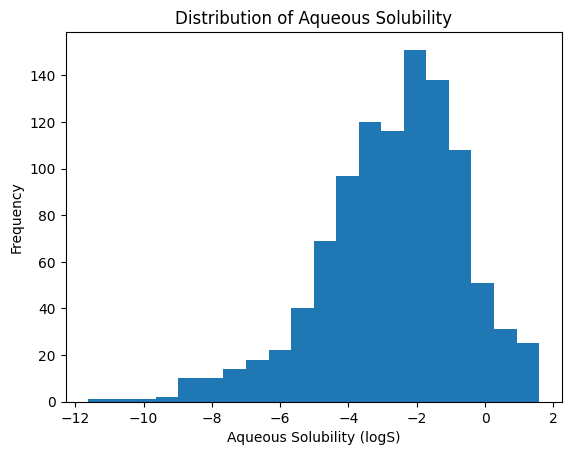

In [ ]:
import matplotlib.pyplot as plt

plt.hist(labels, bins=20)
plt.xlabel('Aqueous Solubility (logS)')
plt.ylabel('Frequency')
plt.title('Distribution of Aqueous Solubility')
plt.show()

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

In [ ]:
faulty_indexes = df[df.isna().any(axis=1)].index
faulty_indexes

Index([985], dtype='int64')

In [ ]:
df = df.drop(faulty_indexes)
labels = [label for i, label in enumerate(labels) if i not in faulty_indexes]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df_scaled, labels, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f"mse: {mse}")
print(f"rmse: {rmse}")

mse: 0.4489001098157357
rmse: 0.6700000819520365


In [ ]:
# Evaluate the model:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

R^2 score: 0.9025283443834224


## Ex6.III Prepare data for test  and test model


1. Download file from : https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [ ]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf

--2024-10-02 15:04:40--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245735 (240K) [text/plain]
Saving to: ‘solubility.test.sdf’

solubility.test.sdf 100%[===================>] 239.98K  --.-KB/s    in 0.02s   

2024-10-02 15:04:40 (14.6 MB/s) - ‘solubility.test.sdf’ saved [245735/245735]



In [ ]:
supplier = SDMolSupplier('/content/solubility.test.sdf', removeHs=False)
molecule_list = [mol for mol in supplier if mol is not None]

In [ ]:
df_test = pd.DataFrame([calculate_descriptors(mol) for mol in molecule_list])

[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerator
[15:05:44] DEPRECATION WARNING: please use MorganGenerat

In [ ]:
labels_test = [float(mol.GetProp('SOL')) for mol in molecule_list]

In [ ]:
faulty_indexes = df_test[df_test.isna().any(axis=1)].index
faulty_indexes

Index([119, 229], dtype='int64')

In [ ]:
df_test = df_test.drop(faulty_indexes)
labels_test = [label for i, label in enumerate(labels_test) if i not in faulty_indexes]

In [ ]:
df_test_scaled = scaler.transform(df_test)

In [ ]:
y_pred_test = model.predict(df_test_scaled)

for i in range(len(y_pred_test)):
  print(f"Predicted logS: {y_pred_test[i]}, Real logS: {labels_test[i]}")

Predicted logS: -3.3648109436035156, Real logS: -3.68
Predicted logS: -3.775463104248047, Real logS: -4.26
Predicted logS: -2.6252403259277344, Real logS: -2.68
Predicted logS: -2.7465286254882812, Real logS: -2.59
Predicted logS: -1.4940910339355469, Real logS: -2.09
Predicted logS: -2.7882308959960938, Real logS: -2.15
Predicted logS: -3.517192840576172, Real logS: -3.66
Predicted logS: -3.0492782592773438, Real logS: -2.77
Predicted logS: -3.4241485595703125, Real logS: -3.4
Predicted logS: -3.641204833984375, Real logS: -3.04
Predicted logS: -3.8289413452148438, Real logS: -4.12
Predicted logS: -4.930248260498047, Real logS: -5.21
Predicted logS: -4.765674591064453, Real logS: -4.62
Predicted logS: -4.461925506591797, Real logS: -4.17
Predicted logS: -4.373744964599609, Real logS: -4.29
Predicted logS: -5.751548767089844, Real logS: -6.35
Predicted logS: -6.042228698730469, Real logS: -6.57
Predicted logS: -7.550140380859375, Real logS: -8.6
Predicted logS: -6.985668182373047, Real

In [ ]:
# Lets evaluate the metrics on the test set:

mse = mean_squared_error(labels_test, y_pred_test)
rmse = np.sqrt(mse)

print(f"mse: {mse}")
print(f"rmse: {rmse}")

mse: 0.4028263713595487
rmse: 0.6346860415666542
